In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.neighbors import KNeighborsClassifier
from sklearn import preprocessing
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
from sklearn import svm
from sklearn.ensemble import RandomForestClassifier

In [ ]:
from google.colab import drive
drive.mount('/content/Drive')

Mounted at /content/Drive


In [ ]:
df=pd.read_csv('/content/Drive/My Drive/Application of ML in industries/indian_liver_patient.csv')
df.head()

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset
0,65,Female,0.7,0.1,187,16,18,6.8,3.3,0.90,1
1,62,Male,10.9,5.5,699,64,100,7.5,3.2,0.74,1
2,62,Male,7.3,4.1,490,60,68,7.0,3.3,0.89,1
3,58,Male,1.0,0.4,182,14,20,6.8,3.4,1.00,1
4,72,Male,3.9,2.0,195,27,59,7.3,2.4,0.40,1


In [ ]:
df.shape

(583, 11)

In [ ]:
df.columns

Index(['Age', 'Gender', 'Total_Bilirubin', 'Direct_Bilirubin',
       'Alkaline_Phosphotase', 'Alamine_Aminotransferase',
       'Aspartate_Aminotransferase', 'Total_Protiens', 'Albumin',
       'Albumin_and_Globulin_Ratio', 'Dataset'],
      dtype='object')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 583 entries, 0 to 582
Data columns (total 11 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Age                         583 non-null    int64  
 1   Gender                      583 non-null    object 
 2   Total_Bilirubin             583 non-null    float64
 3   Direct_Bilirubin            583 non-null    float64
 4   Alkaline_Phosphotase        583 non-null    int64  
 5   Alamine_Aminotransferase    583 non-null    int64  
 6   Aspartate_Aminotransferase  583 non-null    int64  
 7   Total_Protiens              583 non-null    float64
 8   Albumin                     583 non-null    float64
 9   Albumin_and_Globulin_Ratio  579 non-null    float64
 10  Dataset                     583 non-null    int64  
dtypes: float64(5), int64(5), object(1)
memory usage: 50.2+ KB


Gender column is of object type
need to be label encoded

In [ ]:
cols = df.columns
cols
for col in cols:
  le = preprocessing.LabelEncoder()
  df[col] = le.fit_transform(df[col])

**Checking for null values in the dataset**

In [ ]:
df.isnull().sum()

Age                           0
Gender                        0
Total_Bilirubin               0
Direct_Bilirubin              0
Alkaline_Phosphotase          0
Alamine_Aminotransferase      0
Aspartate_Aminotransferase    0
Total_Protiens                0
Albumin                       0
Albumin_and_Globulin_Ratio    0
Dataset                       0
dtype: int64

In [ ]:
df['Albumin_and_Globulin_Ratio'].mean()

33.00686106346484

In [ ]:
df['Albumin_and_Globulin_Ratio'].fillna(df['Albumin_and_Globulin_Ratio'].mean(),inplace=True)

No Null value


In [ ]:
df.describe()

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset
count,583.000000,583.000000,583.000000,583.000000,583.000000,583.000000,583.000000,583.000000,583.000000,583.000000,583.000000
mean,38.430532,0.756432,18.984563,10.758148,108.157804,38.905660,50.415094,30.857633,19.420240,33.006861,0.286449
std,15.647806,0.429603,25.957302,17.591826,63.819326,36.568953,46.116757,10.624906,7.877503,14.882470,0.452490
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,27.000000,1.000000,4.000000,1.000000,60.500000,13.000000,15.000000,24.000000,14.000000,21.000000,0.000000
50%,39.000000,1.000000,6.000000,2.000000,91.000000,25.000000,32.000000,32.000000,19.000000,34.000000,0.000000
75%,52.000000,1.000000,22.000000,12.000000,150.000000,50.500000,76.000000,38.000000,26.000000,42.000000,1.000000
max,71.000000,1.000000,112.000000,79.000000,262.000000,151.000000,176.000000,57.000000,39.000000,72.000000,1.000000


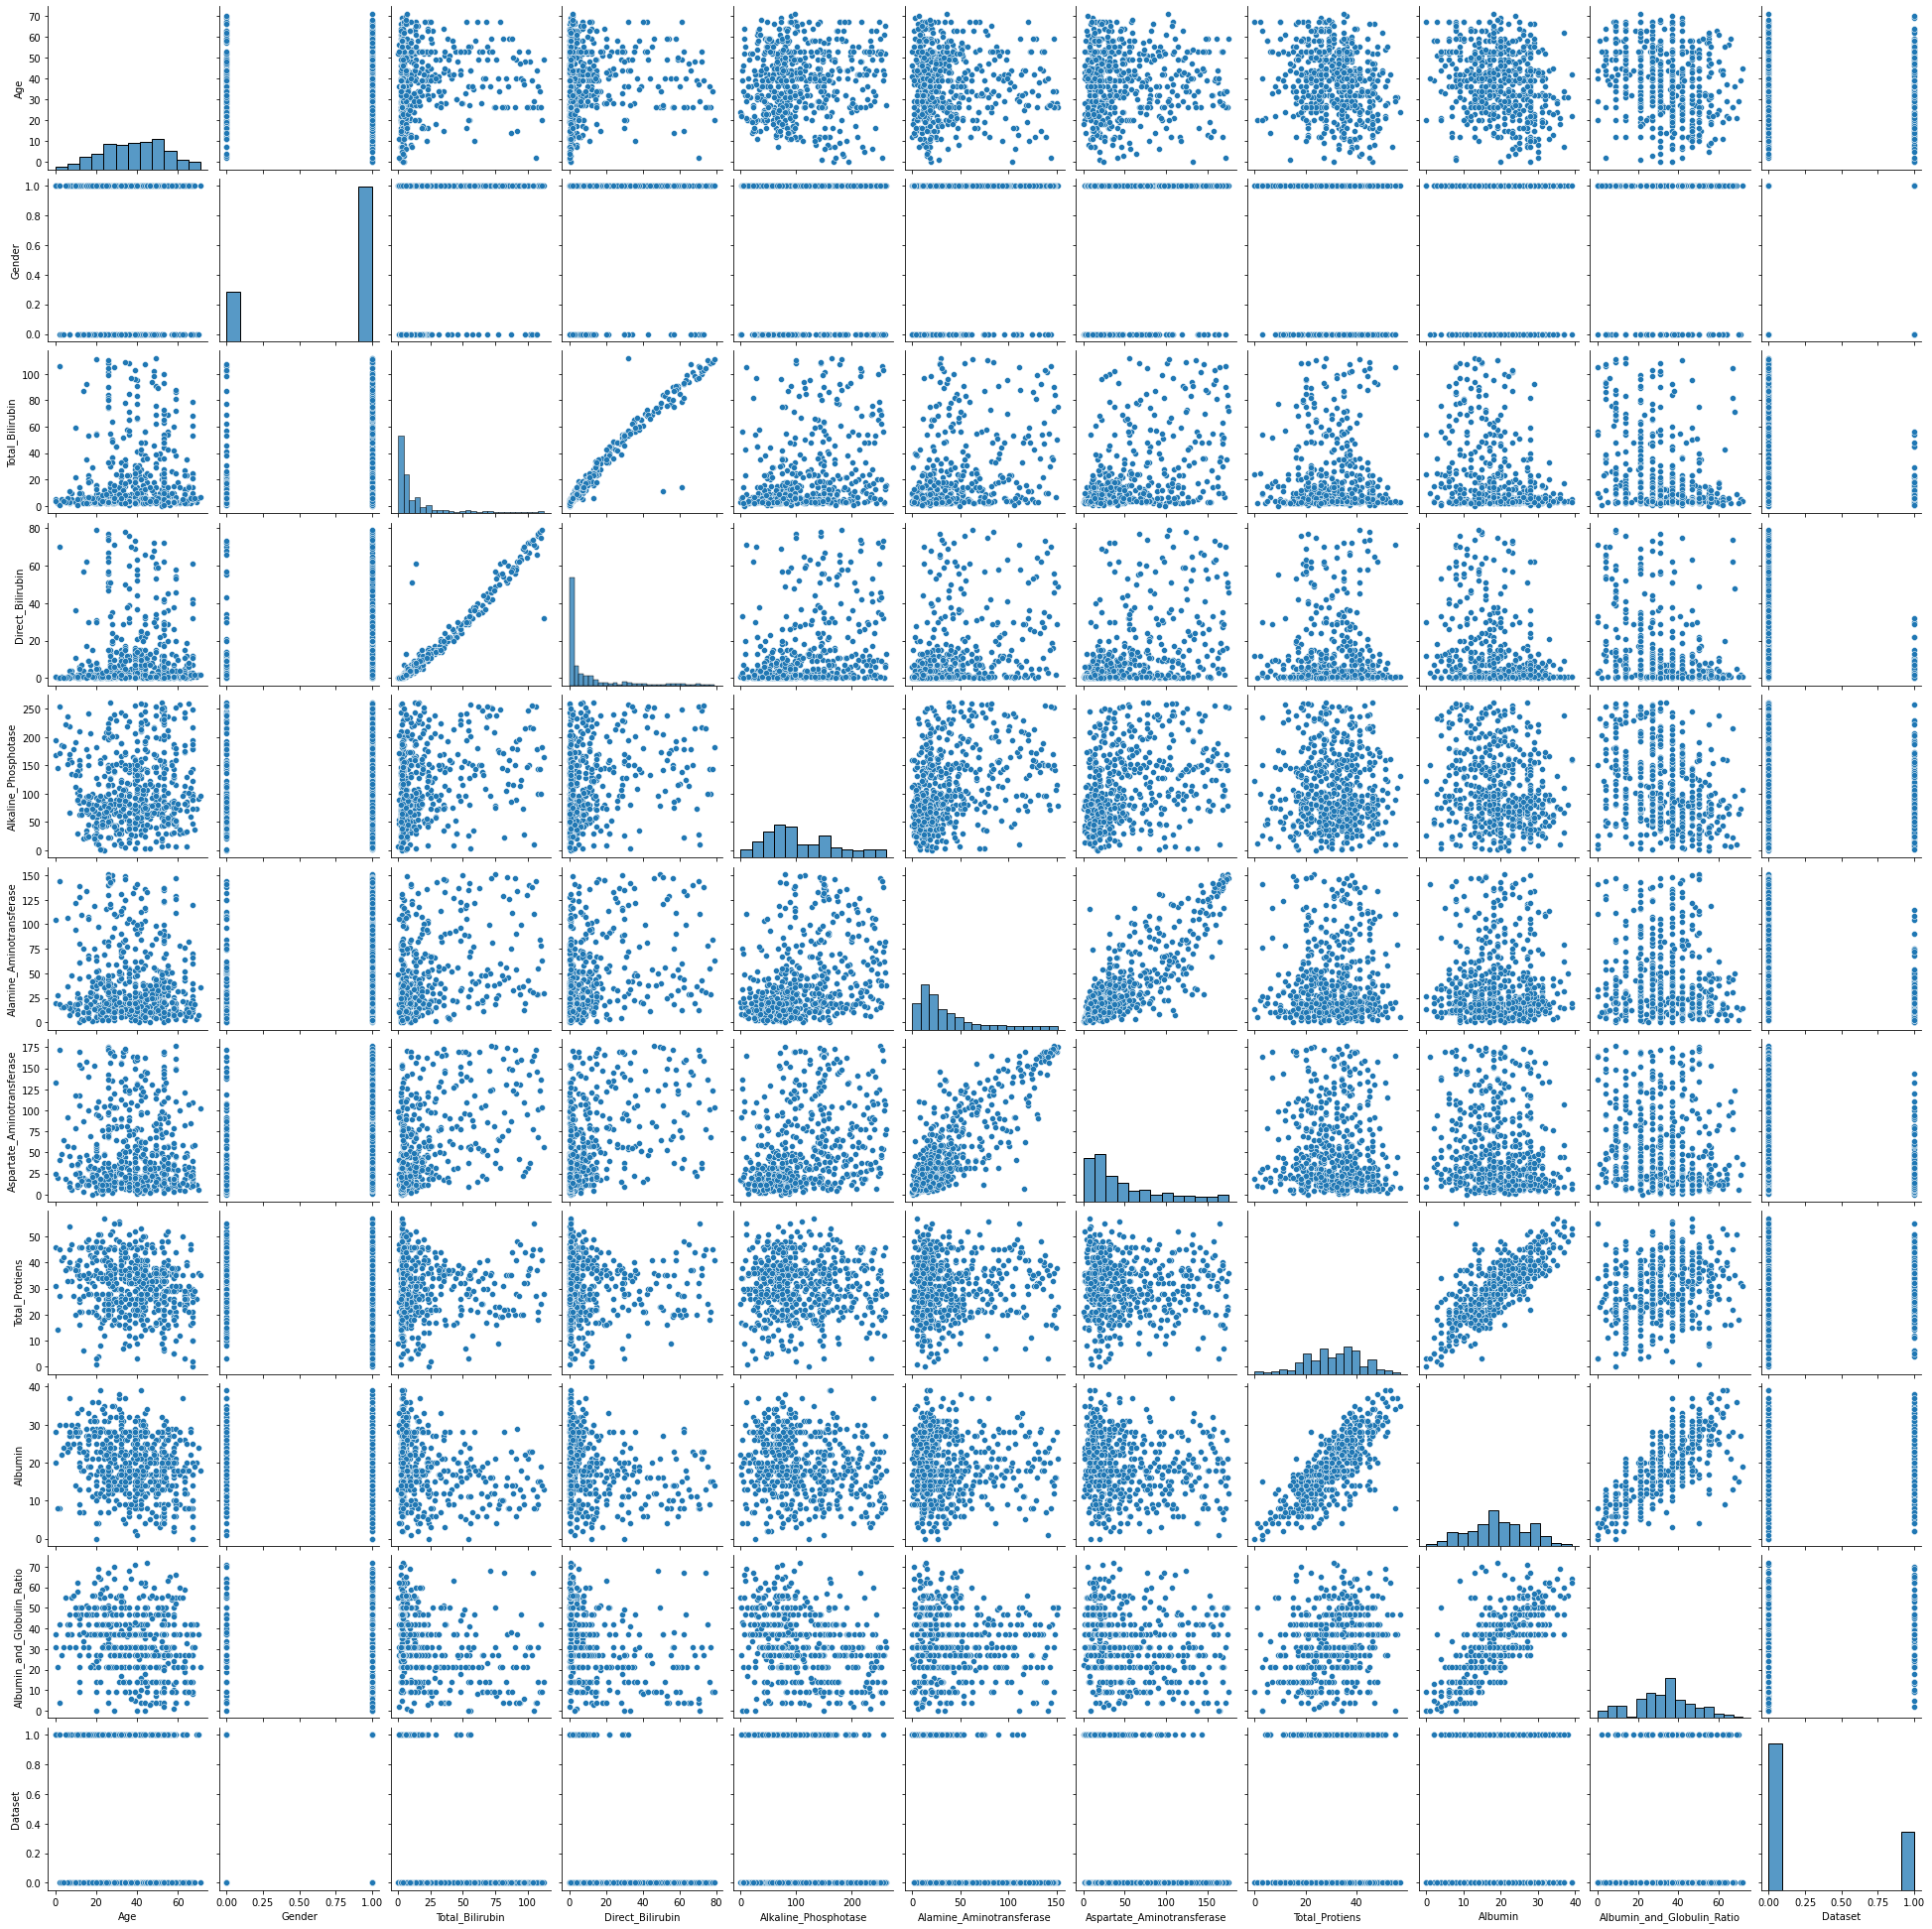

In [ ]:
sns.pairplot(df)

In [ ]:
df['Dataset'].value_counts()

0    416
1    167
Name: Dataset, dtype: int64

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


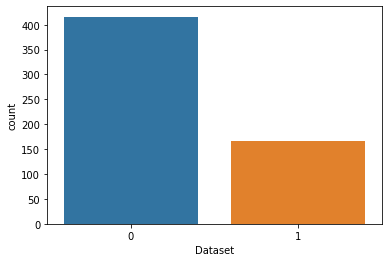

In [ ]:
sns.countplot(df['Dataset'])

In [ ]:
df.describe()

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset
count,583.000000,583.000000,583.000000,583.000000,583.000000,583.000000,583.000000,583.000000,583.000000,583.000000,583.000000
mean,38.430532,0.756432,18.984563,10.758148,108.157804,38.905660,50.415094,30.857633,19.420240,33.006861,0.286449
std,15.647806,0.429603,25.957302,17.591826,63.819326,36.568953,46.116757,10.624906,7.877503,14.882470,0.452490
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,27.000000,1.000000,4.000000,1.000000,60.500000,13.000000,15.000000,24.000000,14.000000,21.000000,0.000000
50%,39.000000,1.000000,6.000000,2.000000,91.000000,25.000000,32.000000,32.000000,19.000000,34.000000,0.000000
75%,52.000000,1.000000,22.000000,12.000000,150.000000,50.500000,76.000000,38.000000,26.000000,42.000000,1.000000
max,71.000000,1.000000,112.000000,79.000000,262.000000,151.000000,176.000000,57.000000,39.000000,72.000000,1.000000


Data Standardization

In [ ]:
scaler = StandardScaler()
df = scaler.fit_transform(df)
df = pd.DataFrame(df,columns=cols)
df

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset
0,1.251695,-1.762281,-0.616331,-0.612068,-0.567052,-0.900598,-0.920523,0.296009,0.200713,-0.134963,-0.633595
1,1.059810,0.567446,1.928490,1.948135,2.004910,0.413118,0.772289,0.955404,0.073660,-0.672970,-0.633595
2,1.059810,0.567446,1.427237,1.436095,1.471698,0.303642,0.164613,0.484407,0.200713,-0.202214,-0.633595
3,0.867925,0.567446,-0.500657,-0.441387,-0.645465,-0.955336,-0.877117,0.296009,0.327766,0.268542,-0.633595
4,1.635464,0.567446,0.617521,0.468907,-0.441590,-0.599538,-0.030711,0.767005,-0.942762,-1.950736,-0.633595
...,...,...,...,...,...,...,...,...,...,...,...
578,0.931887,0.567446,-0.693447,-0.612068,1.503063,-0.791121,-0.573279,-0.551785,-1.959185,-2.085238,1.578296
579,-0.283384,0.567446,-0.654889,-0.612068,-1.617792,-0.380585,-0.638387,-0.457586,0.073660,0.604796,-0.633595
580,0.484155,0.567446,-0.577773,-0.555174,0.154352,-0.024787,-0.247739,-0.080788,0.073660,0.268542,-0.633595
581,-0.859038,0.567446,-0.384984,-0.384494,-0.614100,-0.544800,-0.616685,0.296009,0.327766,0.268542,-0.633595


Label Encoder

In [ ]:
cols = df.columns
cols
for col in cols:
  le = preprocessing.LabelEncoder()
  df[col] = le.fit_transform(df[col])

In [ ]:
df

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset
0,58,0,3,0,72,6,8,34,21,31,0
1,55,1,69,45,236,54,86,41,20,23,0
2,55,1,56,36,202,50,58,36,21,30,0
3,52,1,6,3,67,4,10,34,22,37,0
4,64,1,35,19,80,17,49,39,12,4,0
...,...,...,...,...,...,...,...,...,...,...,...
578,53,1,1,0,204,10,24,25,4,2,1
579,34,1,2,0,5,25,21,26,20,42,0
580,46,1,4,1,118,38,39,30,20,37,0
581,25,1,9,4,69,19,22,34,22,37,0


Dividing dataset into dependent and independent dataset

In [ ]:
Y = df['Dataset']
X = df.drop(['Dataset'],axis=1)
X

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio
0,58,0,3,0,72,6,8,34,21,31
1,55,1,69,45,236,54,86,41,20,23
2,55,1,56,36,202,50,58,36,21,30
3,52,1,6,3,67,4,10,34,22,37
4,64,1,35,19,80,17,49,39,12,4
...,...,...,...,...,...,...,...,...,...,...
578,53,1,1,0,204,10,24,25,4,2
579,34,1,2,0,5,25,21,26,20,42
580,46,1,4,1,118,38,39,30,20,37
581,25,1,9,4,69,19,22,34,22,37


Splitting into train and test set

In [ ]:
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.2,random_state=1)
print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)

(466, 10)
(117, 10)
(466,)
(117,)


In [ ]:
X_train.describe()

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio
count,466.000000,466.000000,466.000000,466.000000,466.000000,466.000000,466.000000,466.000000,466.000000,466.000000
mean,38.650215,0.755365,18.718884,10.523605,107.090129,38.313305,49.879828,30.888412,19.564378,33.478541
std,15.734900,0.430333,26.022330,17.680208,63.639648,35.483883,45.976742,10.597443,7.802477,14.772561
min,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,27.000000,1.000000,4.000000,1.000000,60.000000,13.000000,15.000000,24.000000,14.000000,24.000000
50%,39.000000,1.000000,6.000000,2.000000,90.000000,25.000000,30.500000,32.000000,19.000000,35.500000
75%,52.000000,1.000000,21.000000,11.000000,149.750000,50.750000,75.750000,38.000000,26.000000,42.000000
max,71.000000,1.000000,112.000000,79.000000,262.000000,151.000000,175.000000,56.000000,39.000000,72.000000


In [ ]:
df.isnull().sum()

Age                           0
Gender                        0
Total_Bilirubin               0
Direct_Bilirubin              0
Alkaline_Phosphotase          0
Alamine_Aminotransferase      0
Aspartate_Aminotransferase    0
Total_Protiens                0
Albumin                       0
Albumin_and_Globulin_Ratio    0
Dataset                       0
dtype: int64

Building KNN model

In [ ]:
df

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset
0,58,0,3,0,72,6,8,34,21,31,0
1,55,1,69,45,236,54,86,41,20,23,0
2,55,1,56,36,202,50,58,36,21,30,0
3,52,1,6,3,67,4,10,34,22,37,0
4,64,1,35,19,80,17,49,39,12,4,0
...,...,...,...,...,...,...,...,...,...,...,...
578,53,1,1,0,204,10,24,25,4,2,1
579,34,1,2,0,5,25,21,26,20,42,0
580,46,1,4,1,118,38,39,30,20,37,0
581,25,1,9,4,69,19,22,34,22,37,0


In [ ]:
neigh = KNeighborsClassifier(n_neighbors=10)
neigh.fit(X_train,Y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=10, p=2,
                     weights='uniform')

In [ ]:
Y_pred = neigh.predict(X_test)
Y_train_pred = neigh.predict(X_train)
print(accuracy_score(Y_test, Y_pred))
print(accuracy_score(Y_train, Y_train_pred))

0.7435897435897436
0.7660944206008584


Classification using SVM

In [ ]:
clf = svm.SVC()
clf.fit(X_train, Y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [ ]:
Y_pred_svm = clf.predict(X_test)
Y_train_pred_svm = clf.predict(X_train)
print(accuracy_score(Y_test, Y_pred_svm))
print(accuracy_score(Y_train, Y_train_pred_svm))

0.7094017094017094
0.7145922746781116


Randomforest

In [ ]:
Ran_clf = RandomForestClassifier(max_depth=3, random_state=0)
Ran_clf.fit(X_train, Y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=3, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)

In [ ]:
Y_pred_Ran_clf = Ran_clf.predict(X_test)
Y_train_pred_Ran_clf = Ran_clf.predict(X_train)
print(accuracy_score(Y_test, Y_pred_Ran_clf))
print(accuracy_score(Y_train, Y_train_pred_Ran_clf))

0.7350427350427351
0.7510729613733905
